In [1]:
#importing all required libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks",color_codes=True)
%matplotlib inline

In [2]:
#reading the attrition.csv file in dataframe att
att=pd.read_csv("Attritiondatabase.csv")

Checking for total no of object data type features 

In [3]:
#printing the data available with us and knowing the dimensions
print("Shape of data(rows,columns):",att.shape,"\n")
print("-"*40)
print("Data Types of all the columns:\n",att.dtypes,"\n")
print("-"*40)
print("Column Names:",att.columns,"\n")
print("-"*40)
print("Head :",att.head(5),"\n\n")

Shape of data(rows,columns): (1470, 35) 

----------------------------------------
Data Types of all the columns:
 Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
Relationsh

In [4]:
features_obj=[features for features in att.columns if att[features].dtypes=='O']
print("Total no of features with object dtype =",len(features_obj))

Total no of features with object dtype = 8


Now we convert the object data type features into categorical data type

In [5]:
'''#we convert all the object features into categorical features
con_list=list()#list for column names
con_list=att.columns
for i in range(len(con_list)):
    m=att[con_list[i]].unique()
    if len(m)>1 and len(m)<5:
            print(con_list[i])
            att[con_list[i]] = att[con_list[i]].astype('category')
    elif len(m)==1:
            print("Column with only one category",con_list[i])
            att=att.drop((con_list[i]),axis=1)
    elif att[con_list[i]].dtype=='object' :
        att[con_list[i]] = att[con_list[i]].astype('category')
    else:
        continue'''




'#we convert all the object features into categorical features\ncon_list=list()#list for column names\ncon_list=att.columns\nfor i in range(len(con_list)):\n    m=att[con_list[i]].unique()\n    if len(m)>1 and len(m)<5:\n            print(con_list[i])\n            att[con_list[i]] = att[con_list[i]].astype(\'category\')\n    elif len(m)==1:\n            print("Column with only one category",con_list[i])\n            att=att.drop((con_list[i]),axis=1)\n    elif att[con_list[i]].dtype==\'object\' :\n        att[con_list[i]] = att[con_list[i]].astype(\'category\')\n    else:\n        continue'

In [6]:
for features in att.columns:
    if features_obj in att[features]:
        att[features].astype('category')
    else:
        pass

TypeError: unhashable type: 'list'

# Search for NaN

In [7]:
#Finding NAN
print("Original shape of data :",att.shape,"\n")
print("Total non nan rows and columns : ",att.dropna().shape,"\n")

Original shape of data : (1470, 35) 

Total non nan rows and columns :  (1470, 35) 



Inference
As we can see the count of original data and non nan data is same so we say that there is no NaN 
in the dataset

# Search for NULL

In [8]:
#printing total no of null values in each column
print("Column wise null value count :\n",att.isnull().sum())

Column wise null value count :
 Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

# Univariat Visualisation
(Evaluating outliers)

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


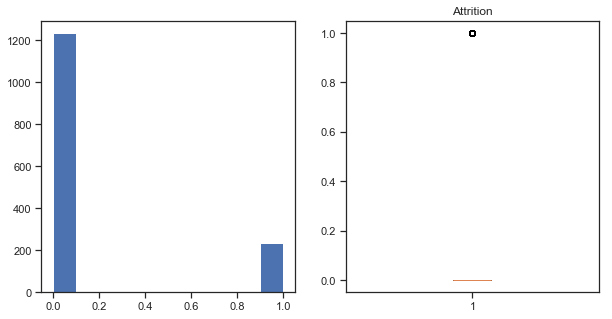

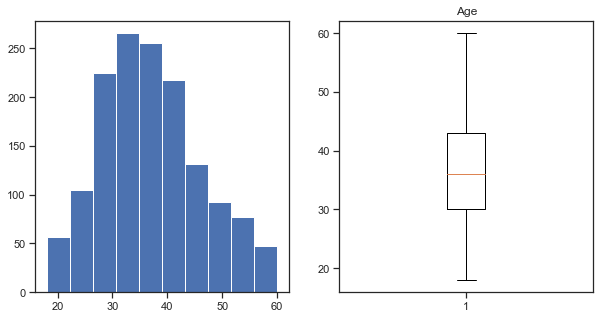

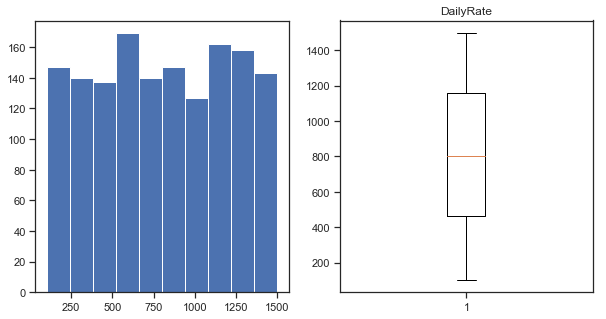

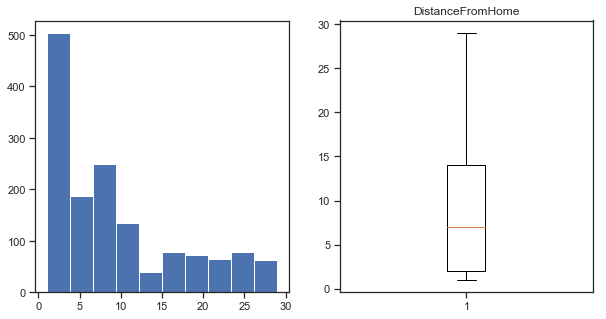

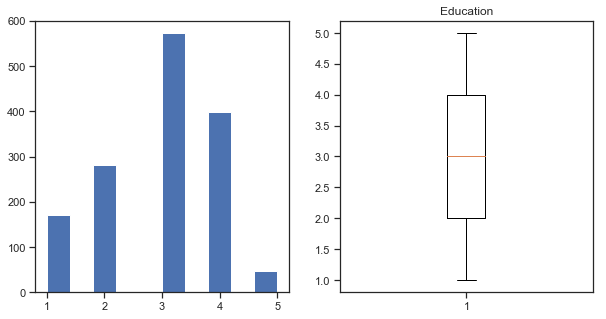

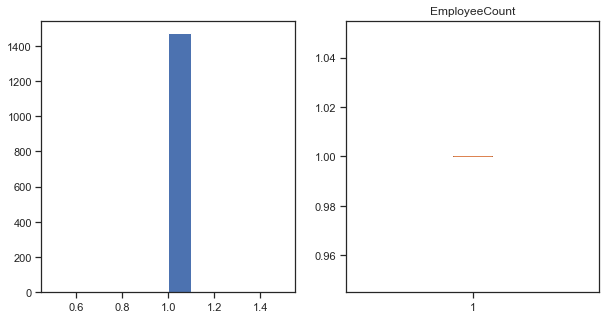

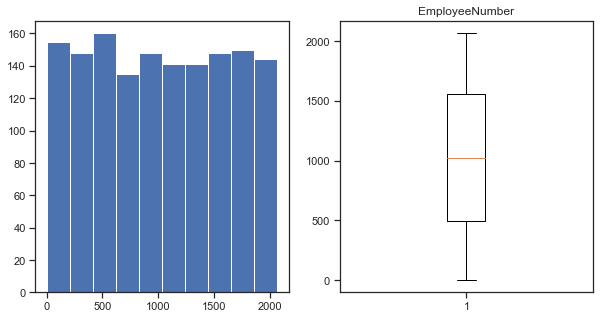

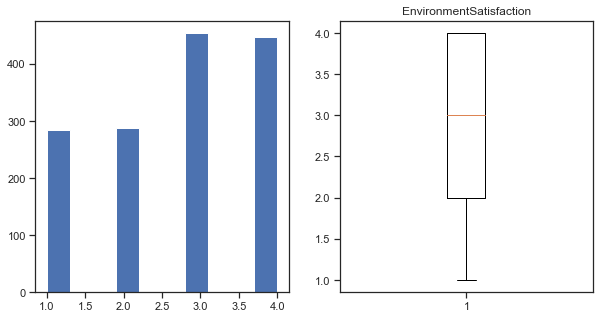

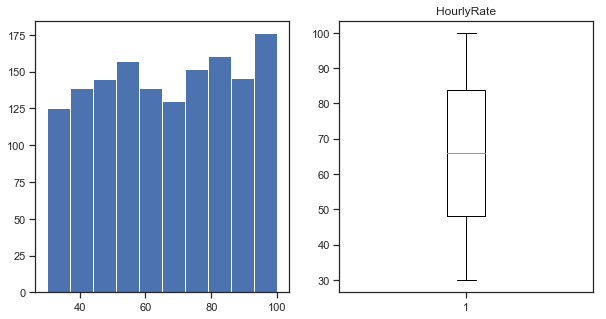

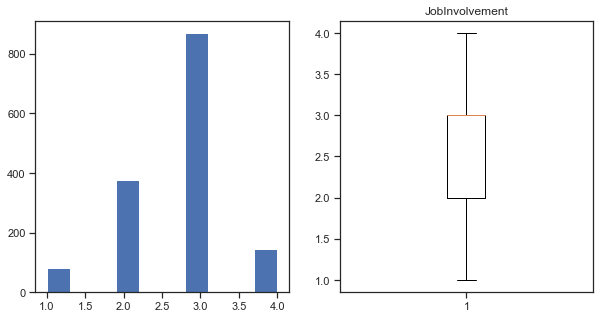

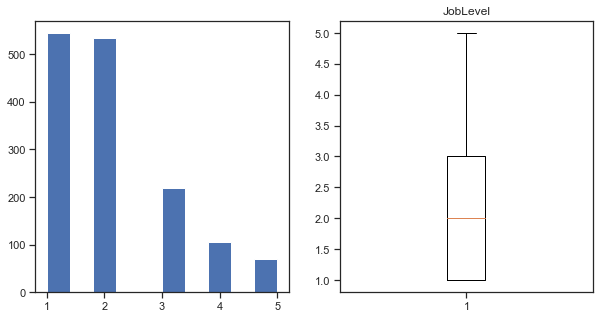

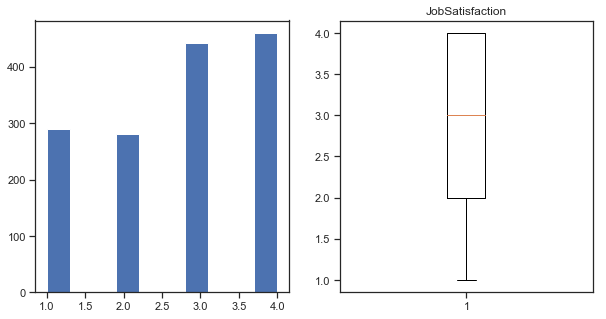

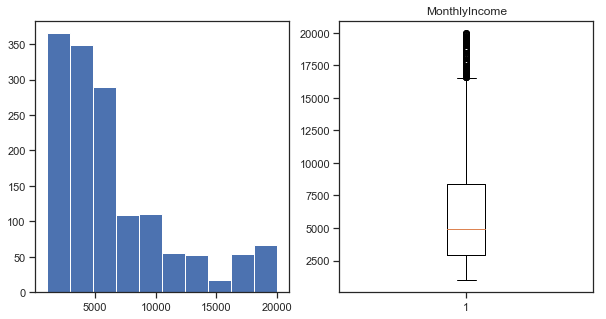

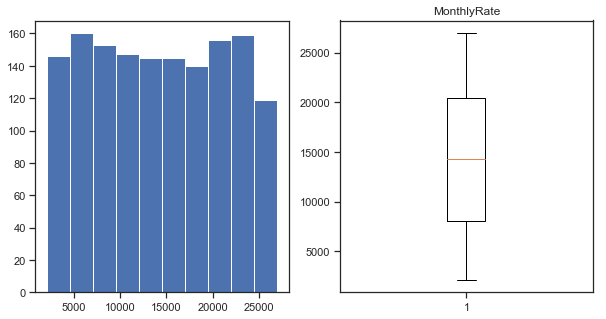

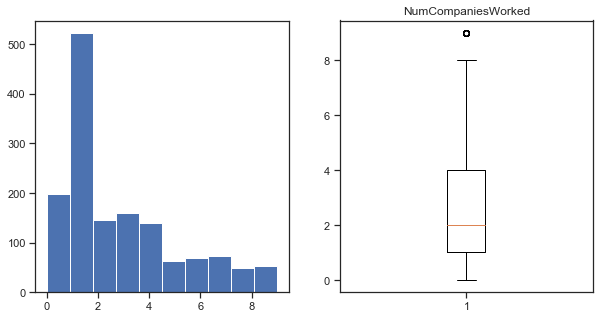

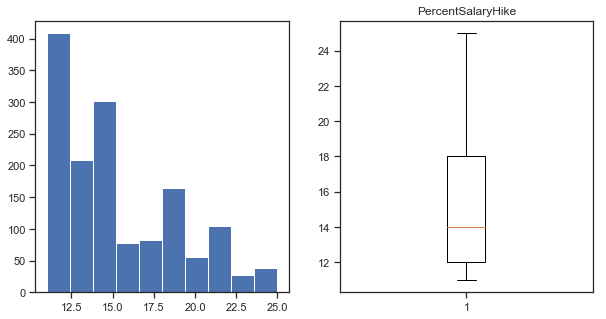

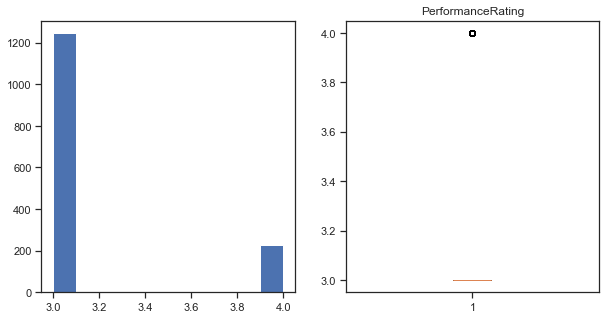

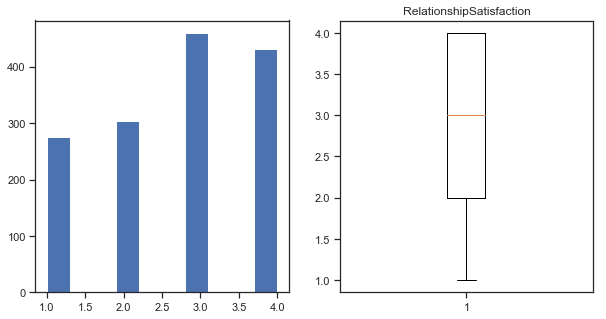

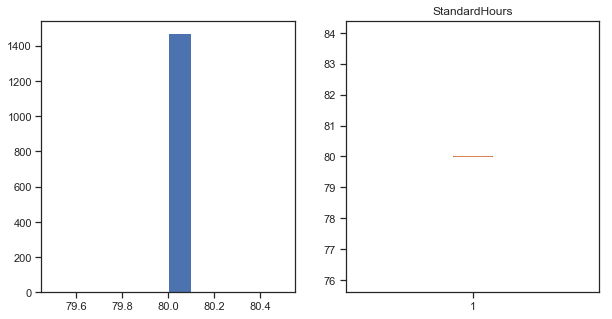

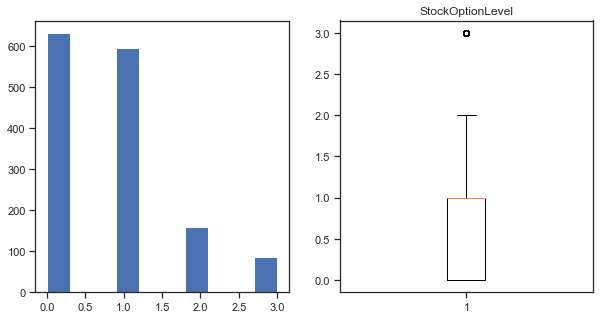

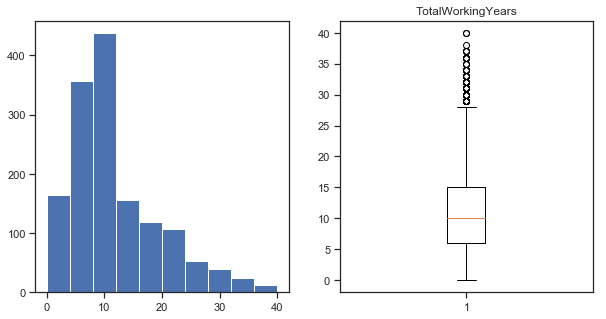

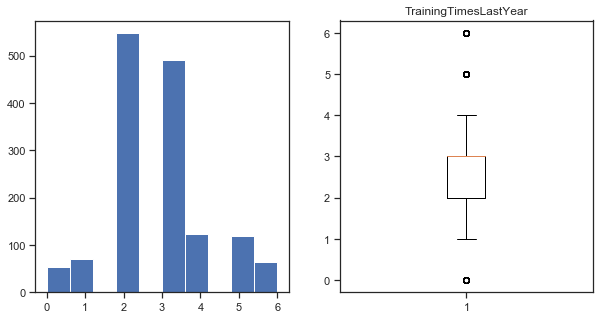

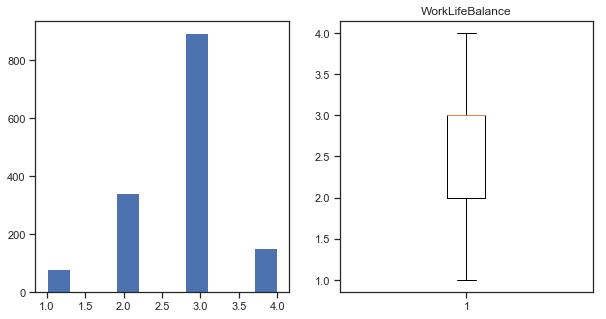

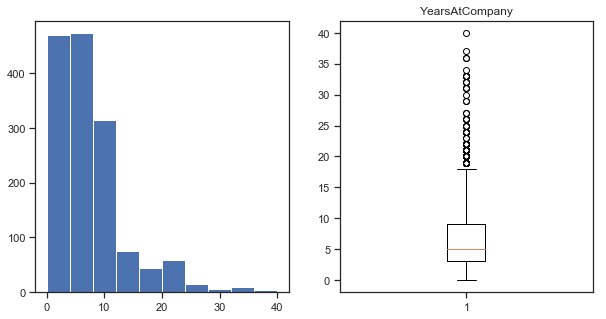

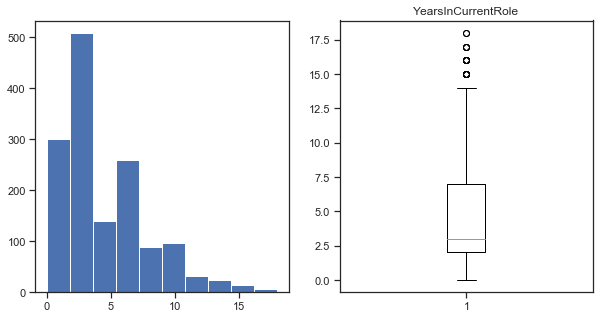

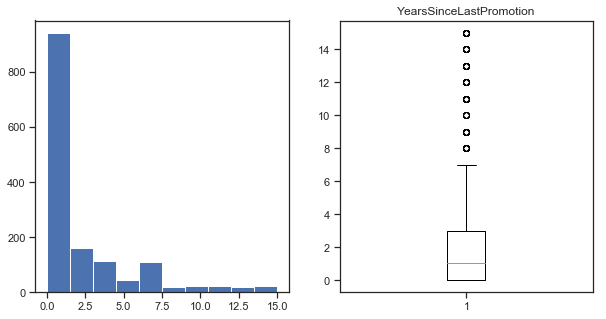

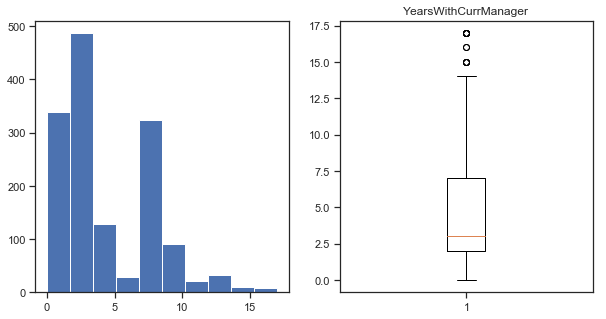

In [12]:

for i in range(len(att.columns)):
    if att[att.columns[i]].dtype=='int64':
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(att[att.columns[i]])
        plt.subplot(1,2,2)
        plt.boxplot(att[att.columns[i]])
        plt.title(att.columns[i])
    else:
        continue


In [8]:
print(att.MonthlyIncome.describe())

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


In [9]:
rws=att.loc[att.MonthlyIncome>att.MonthlyIncome.quantile(0.85)]
att.drop(rws.index,inplace=True)


In [10]:
print(att.MonthlyIncome.describe())

count     1249.000000
mean      4822.200160
std       2426.059656
min       1009.000000
25%       2742.000000
50%       4382.000000
75%       6209.000000
max      10920.000000
Name: MonthlyIncome, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1cefe1e1c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1cefe1e4a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cefe1e1358>],
 'medians': [<matplotlib.lines.Line2D at 0x1cefe1f2898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cefe1f2f98>],
 'means': []}

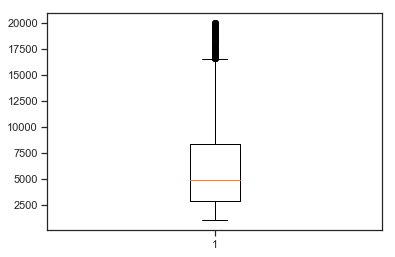

In [13]:
plt.boxplot(att.MonthlyIncome)

# Bivariate Visualisation

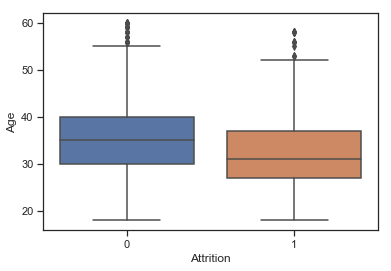

In [11]:
#Age vs Attrition 
sns.boxplot(x="Attrition",y="Age",data=att)


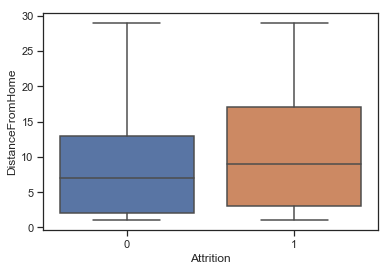

In [12]:
#Distance from home vs attrition
sns.boxplot(x="Attrition",y="DistanceFromHome",data=att)


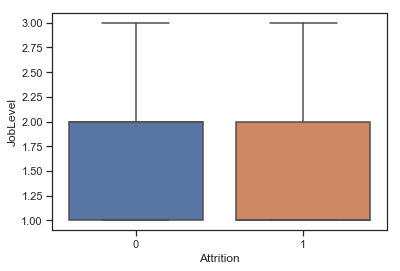

In [13]:
#Job level vs Attrition
sns.boxplot(x="Attrition",y="JobLevel",data=att)

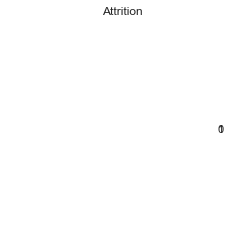

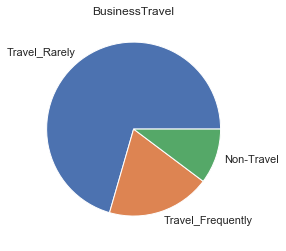

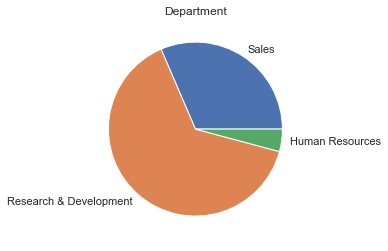

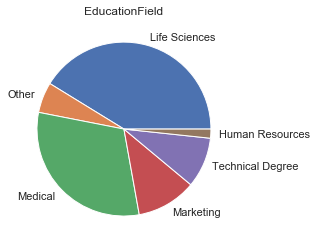

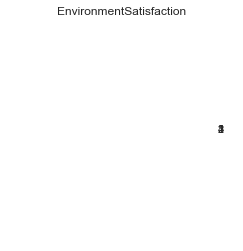

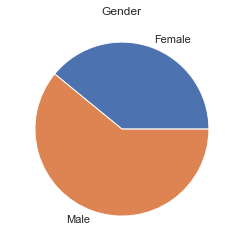

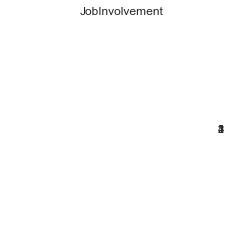

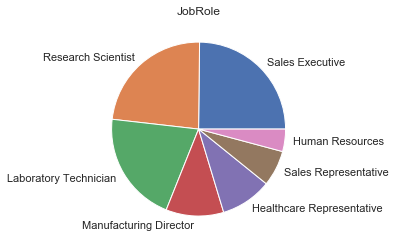

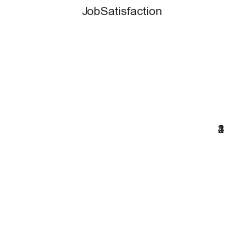

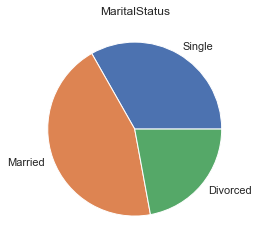

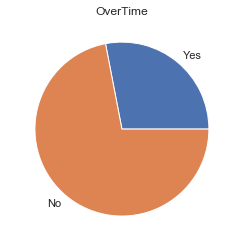

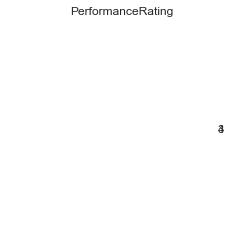

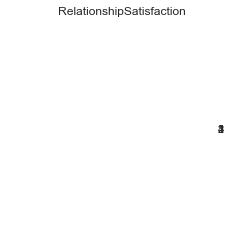

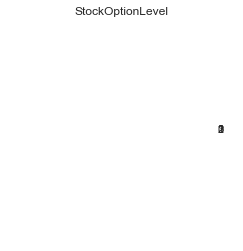

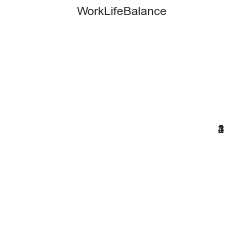

In [14]:
for i in range(len(con_list)):
    if att[con_list[i]].dtype!="O":
        continue
    else :
        tot_per=list()
        labels=list()
        c=att[con_list[i]].unique()
        for n in range(len(c)):
            tot_per.append((sum(att[con_list[i]]==str(c[n]))/len(att))*100)
            labels.append(c[n])
        plt.figure()
        plt.title(str(con_list[i]),loc="center")
        _=plt.pie(tot_per,labels=labels);

 

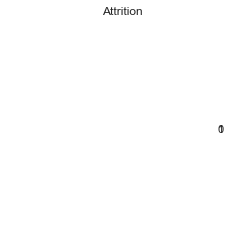

In [15]:
con_list1=["Attrition"]
for i in range(len(con_list1)):
    if att[con_list1[i]].dtype=="int64":
        continue
    else :
        tot_per=list()
        labels=list()
        c=att[con_list1[i]].unique()
        for n in range(len(c)):
            tot_per.append((sum(att[con_list[i]]==str(c[n]))/len(att))*100)
            labels.append(c[n])
        plt.figure()
        plt.title(str(con_list1[i]),loc="center")
        _=plt.pie(tot_per,labels=labels);

 

# Univariate Visualisation(qualitative data)


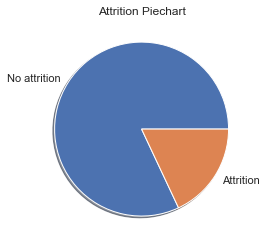

In [16]:
#Visualisation of Attrition data
per_no_0=(sum(att['Attrition']==0)/len(att))*100
per_no_1=(sum(att['Attrition']==1)/len(att))*100

total_per=[per_no_0,per_no_1]
labels=["No attrition","Attrition"]
plt.figure()
plt.title("Attrition Piechart",loc="center")
_=plt.pie(total_per,labels=labels,shadow=True);


Business Travel Data :
 Travel_Rarely        881
Travel_Frequently    240
Non-Travel           128
Name: BusinessTravel, dtype: int64 



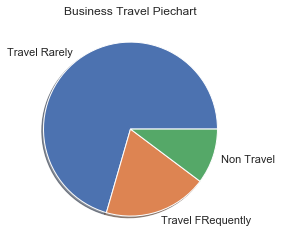

In [17]:
#Visualisation of Business travel hours
print("Business Travel Data :\n",att['BusinessTravel'].value_counts(),'\n')

per_no_TR=(sum(att['BusinessTravel']=='Travel_Rarely')/len(att))*100
per_no_TF=(sum(att['BusinessTravel']=='Travel_Frequently')/len(att))*100
per_no_NT=(sum(att['BusinessTravel']=='Non-Travel')/len(att))*100

total_per=[per_no_TR,per_no_TF,per_no_NT]
labels=['Travel Rarely','Travel FRequently','Non Travel']
plt.figure()
plt.title("Business Travel Piechart",loc="center")
_=plt.pie(total_per,labels=labels,shadow=True);

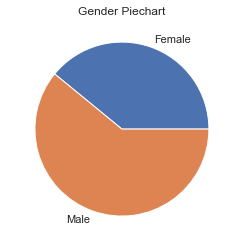

In [18]:
per_no_female=(sum(att['Gender']=='Female')/len(att))*100
per_no_male=(sum(att['Gender']=='Male')/len(att))*100
total_per=[per_no_female,per_no_male]
labels=['Female','Male']
plt.figure()
plt.title("Gender Piechart",loc="center")
_=plt.pie(total_per,labels=labels);

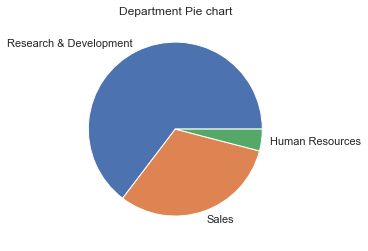

In [19]:
per_no_RD=int((sum(att['Department']=='Research & Development')/len(att))*100)
per_no_Sales=int((sum(att['Department']=='Sales')/len(att))*100)
per_no_Resources=int((sum(att['Department']=='Human Resources')/len(att))*100)
total_per_dept=[per_no_RD,per_no_Sales,per_no_Resources]
lables_Department=["Research & Development","Sales","Human Resources"]
plt.title("Department Pie chart",loc='center')
_=plt.pie(total_per_dept,labels=lables_Department);

In [20]:
print(att['EducationField'].value_counts())

Life Sciences       515
Medical             386
Marketing           139
Technical Degree    117
Other                71
Human Resources      21
Name: EducationField, dtype: int64


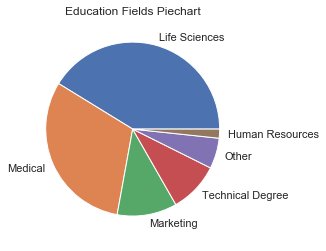

In [21]:
per_no_lf=(sum(att['EducationField']=='Life Sciences')/len(att))*100
per_no_Medical=(sum(att['EducationField']=='Medical')/len(att))*100
per_no_Marketing=(sum(att['EducationField']=='Marketing')/len(att))*100
per_no_TechnicalDegree=(sum(att['EducationField']=='Technical Degree')/len(att))*100
per_no_other=(sum(att['EducationField']=='Other')/len(att))*100
per_no_HR=(sum(att['EducationField']=='Human Resources')/len(att))*100

total_per=[per_no_lf,per_no_Medical,per_no_Marketing,
           per_no_TechnicalDegree,per_no_other,per_no_HR]
label=['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources']
plt.figure()
plt.title("Education Fields Piechart",loc="center")
_=plt.pie(total_per,labels=label);

Job Role count:
 Sales Executive              310
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       134
Healthcare Representative    119
Sales Representative          83
Human Resources               52
Research Director              0
Manager                        0
Name: JobRole, dtype: int64 



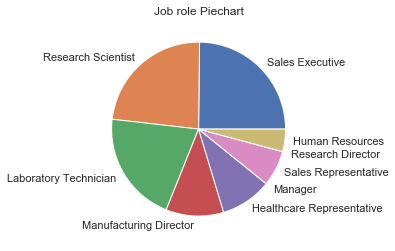

In [22]:
print("Job Role count:\n",att['JobRole'].value_counts(),"\n")
per_no_SE=(sum(att['JobRole']=='Sales Executive')/len(att))*100
per_no_RS=(sum(att['JobRole']=='Research Scientist')/len(att))*100
per_no_LT=(sum(att['JobRole']=='Laboratory Technician')/len(att))*100
per_no_MD=(sum(att['JobRole']=='Manufacturing Director')/len(att))*100
per_no_HRe=(sum(att['JobRole']=='Healthcare Representative')/len(att))*100
per_no_M=(sum(att['JobRole']=='Manager')/len(att))*100
per_no_SR=(sum(att['JobRole']=='Sales Representative')/len(att))*100
per_no_RDi=(sum(att['JobRole']=='Research Director')/len(att))*100
per_no_HRes=(sum(att['JobRole']=='Human Resources')/len(att))*100

total_per=[per_no_SE,per_no_RS,per_no_LT,
           per_no_MD,per_no_HRe,per_no_M,per_no_SR,per_no_RDi,per_no_HRes]
label=['Sales Executive','Research Scientist','Laboratory Technician',
       'Manufacturing Director','Healthcare Representative','Manager',
      'Sales Representative','Research Director','Human Resources']
plt.figure()
plt.title("Job role Piechart",loc="center")
_=plt.pie(total_per,labels=label);

Marital Status Data:
 Married     558
Single      415
Divorced    276
Name: MaritalStatus, dtype: int64 



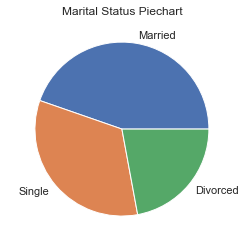

In [23]:
#marital status
print("Marital Status Data:\n",att['MaritalStatus'].value_counts(),'\n')
per_no_Ma=(sum(att['MaritalStatus']=='Married')/len(att))*100
per_no_S=(sum(att['MaritalStatus']=='Single')/len(att))*100
per_no_D=(sum(att['MaritalStatus']=='Divorced')/len(att))*100

total_per=[per_no_Ma,per_no_S,per_no_D]
labels=['Married','Single','Divorced']
plt.figure()
plt.title("Marital Status Piechart",loc="center")
_=plt.pie(total_per,labels=labels);

In [ ]:
print("Over time data :\n",att['OverTime'].value_counts(),"\n")

per_no_No=(sum(att['OverTime']=='No')/len(att))*100
per_no_Y=(sum(att['OverTime']=='Yes')/len(att))*100

total_per=[per_no_No,per_no_Y]
labels=['No','yes']
plt.figure()
plt.title("Over Time Piechart",loc="center")
_=plt.pie(total_per,labels=labels);

# Bivariate Visualisation(Q)

In [14]:
pd.crosstab(index= att['Gender'], columns=att['Attrition'])

pd.crosstab(index= att['BusinessTravel'], columns=att['Attrition'])

pd.crosstab(index= att['Department'], columns=att['Attrition'])

pd.crosstab(index= att['Education'], columns=att['Attrition'])

pd.crosstab(index= att['EducationField'], columns=att['Attrition'])

pd.crosstab(index= att['EnvironmentSatisfaction'], columns=att['Attrition'])

pd.crosstab(index= att['JobInvolvement'], columns=att['Attrition'])

pd.crosstab(index= att['JobLevel'], columns=att['Attrition'])

pd.crosstab(index= att['JobRole'], columns=att['Attrition'])

pd.crosstab(index= att['JobSatisfaction'], columns=att['Attrition'])

print(pd.crosstab(index= att['MaritalStatus'], columns=att['Attrition']))

pd.crosstab(index= att['OverTime'], columns=att['Attrition'])

pd.crosstab(index= att['PerformanceRating'], columns=att['Attrition'])

pd.crosstab(index= att['RelationshipSatisfaction'], columns=att['Attrition'])

pd.crosstab(index= att['StockOptionLevel'], columns=att['Attrition'])

pd.crosstab(index= att['WorkLifeBalance'], columns=att['Attrition'])

Attrition        0    1
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


Attrition,0,1
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


# Elemenating  unnecessary columns

In [15]:
#For loop for test of hypothesis were target is categorical 
#so we check for dtypes of all features and thereby do the hypothesis
import pandas as pd
from scipy import stats

import statsmodels.api as sm

from scipy.stats import chi2

dummy_att=list()#dummy list to traverse through the att dataframe 
dummy_att=att.columns
imp_cat_features=list()
not_imp_cat_features=list()#list for storage of unnecessary features
int_feature=list()

new_list=dummy_att[1:35]

for i in range(len(new_list)):
   
    if att[new_list[i]].dtype=="int64" :
        int_feature.append(new_list[i])
    else :
        contingency_table=pd.crosstab(att[new_list[i]],att['Attrition'])
        #print('contingency_table :-\n',contingency_table)
            
            #Observed Values
        Observed_Values = contingency_table.values
        #print("Observed Values :-\n",Observed_Values)

        chi2,p_val,dof,expected=stats.chi2_contingency(contingency_table)
        print("P-Value of ",new_list[i],"=",p_val)
        if(p_val<=0.05):
            imp_cat_features.append(new_list[i])
        else:
            not_imp_cat_features.append(new_list[i])
                  
        
print("\n",",Important Categorical features:",imp_cat_features,"\n")
print("Not important Categorical features :",not_imp_cat_features,"\n")

#now we do regression analysis here
X=int_feature
print("int64 Columns used for regression analysis are as follows :",X)
X3=att['Attrition']
X2 = sm.add_constant(att[X])
logit_model=sm.Logit(X3,X2)
result=logit_model.fit()
print(result.summary())


P-Value of  BusinessTravel = 5.608614476449931e-06
P-Value of  Department = 0.004525606574479633
P-Value of  EducationField = 0.006773980139025212
P-Value of  Gender = 0.29057244902890855
P-Value of  JobRole = 2.752481638050657e-15
P-Value of  MaritalStatus = 9.45551106034083e-11
P-Value of  Over18 = 1.0
P-Value of  OverTime = 8.15842372153832e-21

 ,Important Categorical features: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'] 

Not important Categorical features : ['Gender', 'Over18'] 

int64 Columns used for regression analysis are as follows : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance

C:\Users\lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.363296
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                           24
Date:                Thu, 24 Sep 2020   Pseudo R-squ.:                  0.1775
Time:                        17:59:56   Log-Likelihood:                -534.05
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 1.172e-35
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0292      0.012     -2.387      0.017      -0.05

In [16]:
#not important int64 columns
#EmployeeCount,StandardHours,HourlyRate,EmployeeNo,MonthlyIncome,MonthlyRate,TotalWorkingYears,
#TrainingTimesLastYear,YearsSineCurrManager,YearsSinceLastPromotion
#not_imp_int_features=list()
not_imp_int_features=['EmployeeCount','StandardHours','HourlyRate','EmployeeNumber','MonthlyIncome','MonthlyRate','TotalWorkingYears',
                      'TrainingTimesLastYear','YearsWithCurrManager','YearsSinceLastPromotion']
print(not_imp_int_features)
print(not_imp_cat_features)

['EmployeeCount', 'StandardHours', 'HourlyRate', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsWithCurrManager', 'YearsSinceLastPromotion']
['Gender', 'Over18']


In [17]:
att=att.drop((not_imp_cat_features+not_imp_int_features),axis=1)
#att=att.drop(not_imp_int_features,axis=1)


In [18]:
print(att.columns)
print(att.shape)


Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')
(1470, 23)


 # Removing unnecessary columns 

In [ ]:
#DATA = pd.get_dummies(att ,columns = ['Gender','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']
#                     ,drop_first=True)

In [19]:
path2= "Attrition_EDA.csv"
att.to_csv(path2,index=False)